In [1]:
import matplotlib.pyplot as plt
import numpy as np
import Pmf
import Cdf

params = {'axes.labelsize' : 12, 'axes.titlesize' : 12,
          'font.size' : 12, 'legend.fontsize' : 12,
          'xtick.labelsize' : 10, 'ytick.labelsize' : 12}
plt.rcParams.update(params)
import math

In [2]:
import dill

class DillSerializer:
   
    def __init__(self, path):
        self.path = path
   
    def serialize(self, obj, protocol_version=2):
        f = open(self.path, "wb+")
        dill.dump(obj, f, protocol_version)
        f.close()
       
    def deserialize(self):
        f = open(self.path, "rb")
        data = dill.load(f)
        f.close()
        return data

In [3]:
import glob
cdfs = []
for d in glob.glob('../data-aggregation/dills/addr-fam/*.dill'):
    cdfs.append((d.split('/')[-1][:-5], DillSerializer(d).deserialize()))

In [4]:
rt_cdfs = [(key, value) for key, value in cdfs if 'rt-' in key.lower()]

In [5]:
rt_v4 = dict([(key.split('-')[1], value) for key, value in rt_cdfs if 'v4' in key.lower()])
rt_v6 = dict([(key.split('-')[1], value) for key, value in rt_cdfs if 'v6' in key.lower()])

In [6]:
colors = {'CleanBrowsing': 'C0',
          'Cloudflare': 'C1',
          'Google': 'C2',
          'Neustar': 'C3',
          'OpenDNS': 'C4',
          'OpenNIC': 'C5',
          'Quad9': 'C6',
          'VeriSign': 'C7',
          'Yandex': 'C8',
          'local': 'C9',
          'NextDNS': '#009E73'
         }

In [7]:
markers = {'CleanBrowsing': 'o',
          'Cloudflare': 'v',
          'Google': '^',
          'Neustar': '<',
          'OpenDNS': '>',
          'OpenNIC': 's',
          'Quad9': 'p',
          'VeriSign': 'h',
          'Yandex': 'd',
          'local': '*',
           'NextDNS': '.'
         }

In [8]:
#can be found in the dill/cdf generation section of ripe-dns-agg.ipynb
v4_samples = {  'CleanBrowsing' : 263438,
                'Cloudflare' : 213549,
                'Google' : 320042,
                'Neustar' : 5623,
                'OpenDNS' : 394895,
                'OpenNIC' : 5615,
                'Quad9' : 116137,
                'VeriSign' : 153944,
                'Yandex' : 112284,
                'local' : 963122,
                'NextDNS' : 363910,
        }

v6_samples = {  'CleanBrowsing' : 84483,
                'Cloudflare' : 61944,
                'Google' : 64565,
                'Neustar' : 216,
                'OpenDNS' : 55957,
                'OpenNIC' : 217,
                'Quad9' : 34725,
                'VeriSign' : 30622,
                'Yandex' : 24782,
                'local' : 448202,
                'NextDNS' : 129133,
         }

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


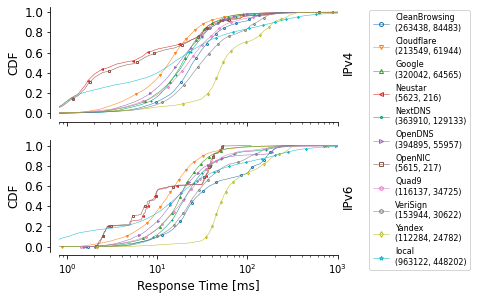

In [13]:
fig, (ax_v4, ax_v6) = plt.subplots(figsize=(5,4.5), nrows=2)

for (rt_cdf, ax, smples) in [(rt_v4, ax_v4, v4_samples), (rt_v6, ax_v6, v6_samples)]:
    
    for k in sorted(rt_cdf.keys()):
        
        ax.plot(rt_cdf[k].xs, rt_cdf[k].ps,
                label=k + '\n(' + str(v4_samples[k]) + ', ' + str(v6_samples[k]) + ')', color=colors[k],
                marker=markers[k], markersize=2, markevery=max(1, int(len(rt_cdf[k].xs)/10)),
                linewidth=0.5, fillstyle='none')

        ax.set_yticks(np.arange(0, 1.1, 0.2))
        ax.set_xscale('log')
        ax.grid(False)
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        ax.spines['bottom'].set_position(('axes', -0.03))
        ax.spines['left'].set_position(('axes', -0.03))
        ax.set_xlim([0.8, 1000])


ax_v4.set_xlabel('')
ax_v6.set_xlabel('Response Time [ms]')

ax_v4.set_title('')
ax1_ = ax_v4.twinx()
ax1_.spines['right'].set_color('none')
ax1_.spines['top'].set_color('none')
ax1_.spines['left'].set_color('none')
ax1_.spines['bottom'].set_color('none')
ax1_.yaxis.set_ticks_position('none')
ax1_.set_ylabel('IPv4')
plt.setp(ax1_.get_yticklabels(), visible = False)

ax_v6.set_title('')
ax2_ = ax_v6.twinx()
ax2_.spines['right'].set_color('none')
ax2_.spines['top'].set_color('none')
ax2_.spines['left'].set_color('none')
ax2_.spines['bottom'].set_color('none')
ax2_.yaxis.set_ticks_position('none')
ax2_.set_ylabel('IPv6')
plt.setp(ax2_.get_yticklabels(), visible = False)

ax_v4.set_ylabel('CDF')
ax_v6.set_ylabel('CDF')

plt.setp(ax_v4.get_xticklabels(), visible = False)

ax_v4.legend(loc = 'lower left', markerscale = 2, fontsize = 8, ncol=1, bbox_to_anchor=(1.1,-1.4))

fig.savefig('../plots/response-time-v4v6.pdf', bbox_inches='tight')
fig.savefig('../plots/response-time-v4v6.eps', bbox_inches='tight')

In [10]:
for k in sorted(rt_v4.keys()):
    print(k)
    #print(list(zip(rt_v4[k].xs, rt_v4[k].ps)))
    for x, p in list(zip(rt_v4[k].xs, rt_v4[k].ps))[::math.ceil(len(rt_v4[k].ps)/100)]:
        print(x, p)
    print('===================================================')

CleanBrowsing
0.454 3.7959595806223855e-06
1.701 0.006263333308026936
2.745 0.013320022168403951
3.709 0.02089675749132623
4.633 0.029395910992339753
5.5 0.04040039781656405
6.358 0.05356098968258186
7.211 0.06809571891678498
8.071 0.08137018957022146
8.924 0.09631108647955117
9.775 0.1111381046014622
10.623 0.12692170453769008
11.472 0.14217387013263083
12.321 0.1578056316856338
13.17 0.17229860536445007
14.015 0.19031422953408392
14.86 0.20979889006141864
15.705 0.23255566774724984
16.549 0.25690674845694245
17.392 0.2813527281561506
18.235 0.3050660876562986
19.08 0.3285934451369962
19.923 0.3528648106954957
20.766 0.3799375944244946
21.609 0.4052946044230521
22.452 0.4300328730099682
23.295 0.4577813375443178
24.139 0.4838709677419355
24.982 0.505538305028128
25.826 0.5255695837350723
26.673 0.5430006301292903
27.52 0.5609858866222792
28.367 0.5774565552425998
29.214 0.5938133450755017
30.059 0.6091110621854099
30.914 0.6234104419256143
31.769 0.6366507489428253
32.63 0.64972023777

2.552 0.25439871584285273
4.737 0.3033790111740776
6.922 0.3421466854666387
9.107 0.38270229524400856
11.292 0.4269313752567172
13.477 0.4699466941882752
15.662 0.5129703194403201
17.847 0.5456100057936586
20.032 0.5760786276297292
22.217 0.6008179649099491
24.403 0.6232024603321282
26.588 0.6437533355068206
28.774 0.6611727278579453
30.96 0.6789036072273295
33.147 0.6939754257508395
35.342 0.706996621404142
37.537 0.7185600578119906
39.756 0.7282784527816829
41.983 0.7376583651915334
44.215 0.7462304879340312
46.483 0.7539107195142464
48.791 0.7611091845062204
51.147 0.7672880486584254
53.568 0.7732384889972402
56.028 0.7788867869283435
58.567 0.7840771989426054
61.199 0.788947817618121
63.953 0.7935983188007334
66.671 0.7982654326243197
69.517 0.802594063888064
72.485 0.8066838884378096
75.548 0.8106532713404948
78.82 0.8144118813608244
82.166 0.8181393426793283
85.478 0.8218335787158844
88.974 0.8254468281276931
92.701 0.8288482663670854
96.496 0.8321147268985652
100.357 0.835449714

In [11]:
list(zip(rt_v4['local'].xs, rt_v4['local'].ps))[::1000]

[(0.343, 1.0382900608645634e-06),
 (1.367, 0.18846522039783123),
 (2.367, 0.24702581812065347),
 (3.367, 0.27926472451049816),
 (4.367, 0.2973704265918544),
 (5.367, 0.31447002560423293),
 (6.367, 0.33287164035293554),
 (7.367, 0.3497085519799153),
 (8.367, 0.3676460510714115),
 (9.367, 0.3874358596314901),
 (10.367, 0.4066525320779714),
 (11.367, 0.428558375782092),
 (12.367, 0.4481509092306063),
 (13.367, 0.46758146942962575),
 (14.367, 0.4885902305211593),
 (15.367, 0.5075764025741287),
 (16.367, 0.5241475119455271),
 (17.367, 0.538476953075519),
 (18.367, 0.5533681091284386),
 (19.367, 0.56734868479798),
 (20.367, 0.5802141369421527),
 (21.367, 0.5916560934128802),
 (22.367, 0.6024273145042892),
 (23.367, 0.6126793905652659),
 (24.368, 0.6228234844599126),
 (25.368, 0.6328855534397512),
 (26.368, 0.6418844133972643),
 (27.368, 0.6499685398111558),
 (28.368, 0.6580890063771776),
 (29.37, 0.6657578167667232),
 (30.37, 0.6741638130994827),
 (31.371, 0.6820517026918708),
 (32.371, 0.68

In [12]:
for k in sorted(rt_v6.keys()):
    print(k)
    for x, p in list(zip(rt_v6[k].xs, rt_v6[k].ps))[::math.ceil(len(rt_v6[k].ps)/100)]:
        print(x, p)
    print('===================================================')

CleanBrowsing
1.681 1.1836700874732195e-05
3.781 0.00819099700531468
4.88 0.01794443852609401
5.579 0.031166033403169868
6.277 0.04393783364700591
7.21 0.05390433578353041
8.051 0.06459287667341358
8.792 0.07666631156564042
9.633 0.08712995513890369
10.324 0.10083685475184356
11.141 0.11211723068546335
11.948 0.12311352579808955
12.742 0.1340032906028432
13.49 0.14576897127232696
14.177 0.15902607625202703
14.877 0.17253175195009646
15.533 0.18712640412864126
16.138 0.20337819442964858
16.772 0.21946427091840962
17.382 0.2354438170992981
18.029 0.2508196915355752
18.646 0.2672135222470793
19.256 0.2848028597469313
19.836 0.3060023910135767
20.421 0.32668110744173384
21.0 0.34881573807748306
21.594 0.3689499662654025
22.187 0.38727317921948795
22.81 0.40455476249659694
23.44 0.41995431033462355
24.089 0.4344424322052957
24.729 0.4485044328444776
25.404 0.46254276008191
26.106 0.47537374383011965
26.861 0.4872577915083508
27.684 0.4980646994069813
28.531 0.5083152823644994
29.343 0.51908

In [14]:
list(zip(rt_v6['local'].xs, rt_v6['local'].ps))[::1000]

[(0.278, 2.231136853472318e-06),
 (1.301, 0.1325540716016439),
 (2.302, 0.16877211614406004),
 (3.302, 0.18549002458712813),
 (4.302, 0.20165461109053506),
 (5.302, 0.22335241699055336),
 (6.302, 0.24581550283131268),
 (7.302, 0.2680577061235782),
 (8.302, 0.29332086871544527),
 (9.302, 0.3169843061833727),
 (10.302, 0.34207790237437585),
 (11.302, 0.36633705338218037),
 (12.302, 0.39330926680380723),
 (13.302, 0.41852780665860484),
 (14.302, 0.4411693834476419),
 (15.302, 0.4646074760933686),
 (16.302, 0.48606655035006535),
 (17.302, 0.5061289329364884),
 (18.302, 0.5260596784485567),
 (19.302, 0.5451202805877707),
 (20.303, 0.5620367602107978),
 (21.304, 0.5766707868327228),
 (22.306, 0.5899438199740296),
 (23.309, 0.6041873976465969),
 (24.31, 0.618317187339637),
 (25.316, 0.6296469002815694),
 (26.325, 0.6400216866502157),
 (27.337, 0.6501532791018335),
 (28.354, 0.6595151293390034),
 (29.378, 0.6676119249802545),
 (30.4, 0.6756194751473666),
 (31.465, 0.6824846832455009),
 (32.535